In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time


ValueError: attempted relative import beyond top-level package

In [14]:
cd 

__init__.py                             optim_utils.py
__pycache__/                            optim_utils.pyc
algorithms/                             readme.md
bandit_definitions/                     script_continuous.py
cachedir/                               script_fair_01.py
data_saves/                             script_range_adaptation_neurips.py
experiment_range_adaptation_neurips.py  script_test copy.py
figures/                                script_test.py
notebooks/                              sim_utilities.py


In [16]:
from bandit_definitions import *
from algorithms import *
from sim_utilities import *

In [46]:
data_dict = load_data_dict('data_saves/continuous/medzo_adapt_garland.pkl')

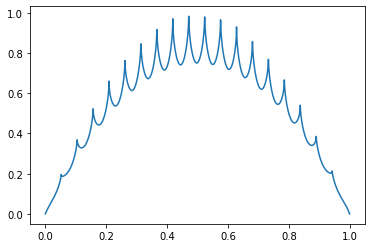

In [58]:
band = data_dict['band_list'][0]
xs = np.linspace(0, 1, 5000)
plt.plot(xs, [band._compute_mean_reward(x) for x in xs])
plt.show()

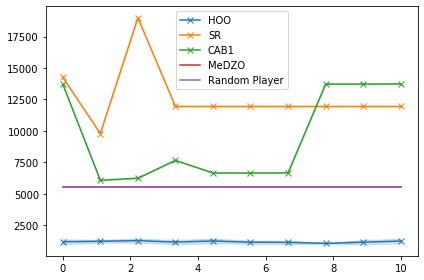

In [57]:
r, alphas, N_tests = data_dict['results'], data_dict['alphas'], data_dict['N_tests']

n_alpha = len(alphas)
n_algs = 3 # number of tunable algorithms, excluding medzo
gen_alg_labels= [
                "HOO",
                "SR",
                "CAB1"
                ]

colors = plt.get_cmap('tab10').colors
for i in range(n_algs):
    means = []
    variances = []
    for j in range(n_alpha):
        mean_whole_regret, var_whole_regret = r[0][i*n_alpha + j]
        means.append(mean_whole_regret[-1])
        variances.append(var_whole_regret[-1])
    means = np.array(means)
    variances = np.array(variances)
    sig = np.sqrt(variances / N_tests[0])
    plt.plot(alphas, means, 'x-', label=gen_alg_labels[i], color=colors[i])
    plt.fill_between(alphas, means+ 2*sig, means- 2*sig, alpha=0.2, color=colors[i])

### MeDZO
mean_whole_regret, var_whole_regret = r[0][n_algs*n_alpha]
mean, sig = mean_whole_regret[-1], np.sqrt(var_whole_regret[-1] / N_tests[0])
plt.plot(alphas, [mean for _ in alphas], label="MeDZO", color=colors[n_algs])
plt.fill_between(alphas, [mean+ 2*sig for _ in alphas], [mean- 2*sig for _ in alphas], alpha=0.2, color=colors[n_algs])

### Random Player
mean_whole_regret, var_whole_regret = r[0][-1]
mean, sig = mean_whole_regret[-1], np.sqrt(var_whole_regret[-1] / N_tests[0])
plt.plot(alphas, [mean for _ in alphas], label="Random Player", color=colors[n_algs+1])
plt.fill_between(alphas, [mean+ 2*sig for _ in alphas], [mean- 2*sig for _ in alphas], alpha=0.2, color=colors[n_algs+1])

plt.legend()
plt.tight_layout()
plt.show()

In [20]:
a = np.ones(10)

In [21]:
a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Help on function fill_between in module matplotlib.pyplot:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*, *y2*). This
    creates one or multiple polygons describing the filled area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly. Use *step* if
    the filling should be a step function, i.e. constant in between *x*.
    
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) or scalar, optional, default: 0
        The y coordinates of the nodes defining the second curve.
    
    where : array of bool (length N), optional, default: N